<a href="https://colab.research.google.com/github/Mohammedbinabu/My_Revision/blob/main/Nifty1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class Solution:
    def mergeTwoLists(list1:list,list2:list):
      output = list1.extend(list2)
      print(list(set(sorted(list1))))
      return
s = Solution
s.mergeTwoLists([1,2,4],[1,3,4])

[1, 2, 3, 4]


In [ ]:
import re
class Solution:
    def isPalindrome(s: str):
        real = re.sub('[^A-Za-z0]+','',s).lower()
        rev = s[::-1].lower()
        output = re.sub('[^A-Za-z0]+','',rev)
        if real == output:
            print('true')
        else:
            print('false')
        return
a = Solution
a.isPalindrome(" ")

true


In [ ]:
import re
class Solutions:
  def isPalindrome(s:str):
    real = re.sub('[^A-Za-z0-9]+','',s).lower()
    rev = s[::-1].lower()
    output = re.sub('[^A-Za-z0-9]+','',rev)
    if real == output:print('true')
    else:print('false')
    return
S = Solutions
S.isPalindrome("race")

false


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Nifty-50.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,31-DEC-2019,12247.10,12247.10,12151.80,12168.45,426931711.0,14812.89
1,01-JAN-2020,12202.15,12222.20,12165.30,12182.50,304078039.0,10445.68
2,02-JAN-2020,12198.55,12289.90,12195.25,12282.20,407697594.0,15256.55
3,03-JAN-2020,12261.10,12265.60,12191.35,12226.65,428770054.0,16827.27
4,06-JAN-2020,12170.60,12179.10,11974.20,11993.05,396501419.0,16869.22
...,...,...,...,...,...,...,...
1238,23-DEC-2024,23738.20,23869.55,23647.20,23753.45,189758237.0,18243.28
1239,24-DEC-2024,23769.10,23867.65,23685.15,23727.65,177664746.0,16010.71
1240,26-DEC-2024,23775.80,23854.50,23653.60,23750.20,177681783.0,16695.10
1241,27-DEC-2024,23801.40,23938.85,23800.60,23813.40,176821521.0,17164.99


In [ ]:
df['Date '] = pd.to_datetime(df['Date '], format='%d-%b-%Y')

#**General Overview of the Data**

In [ ]:
df.info()

#No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1243 non-null   datetime64[ns]
 1   Open             1243 non-null   float64       
 2   High             1243 non-null   float64       
 3   Low              1243 non-null   float64       
 4   Close            1243 non-null   float64       
 5   Shares Traded    1242 non-null   float64       
 6   Turnover (₹ Cr)  1242 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.1 KB


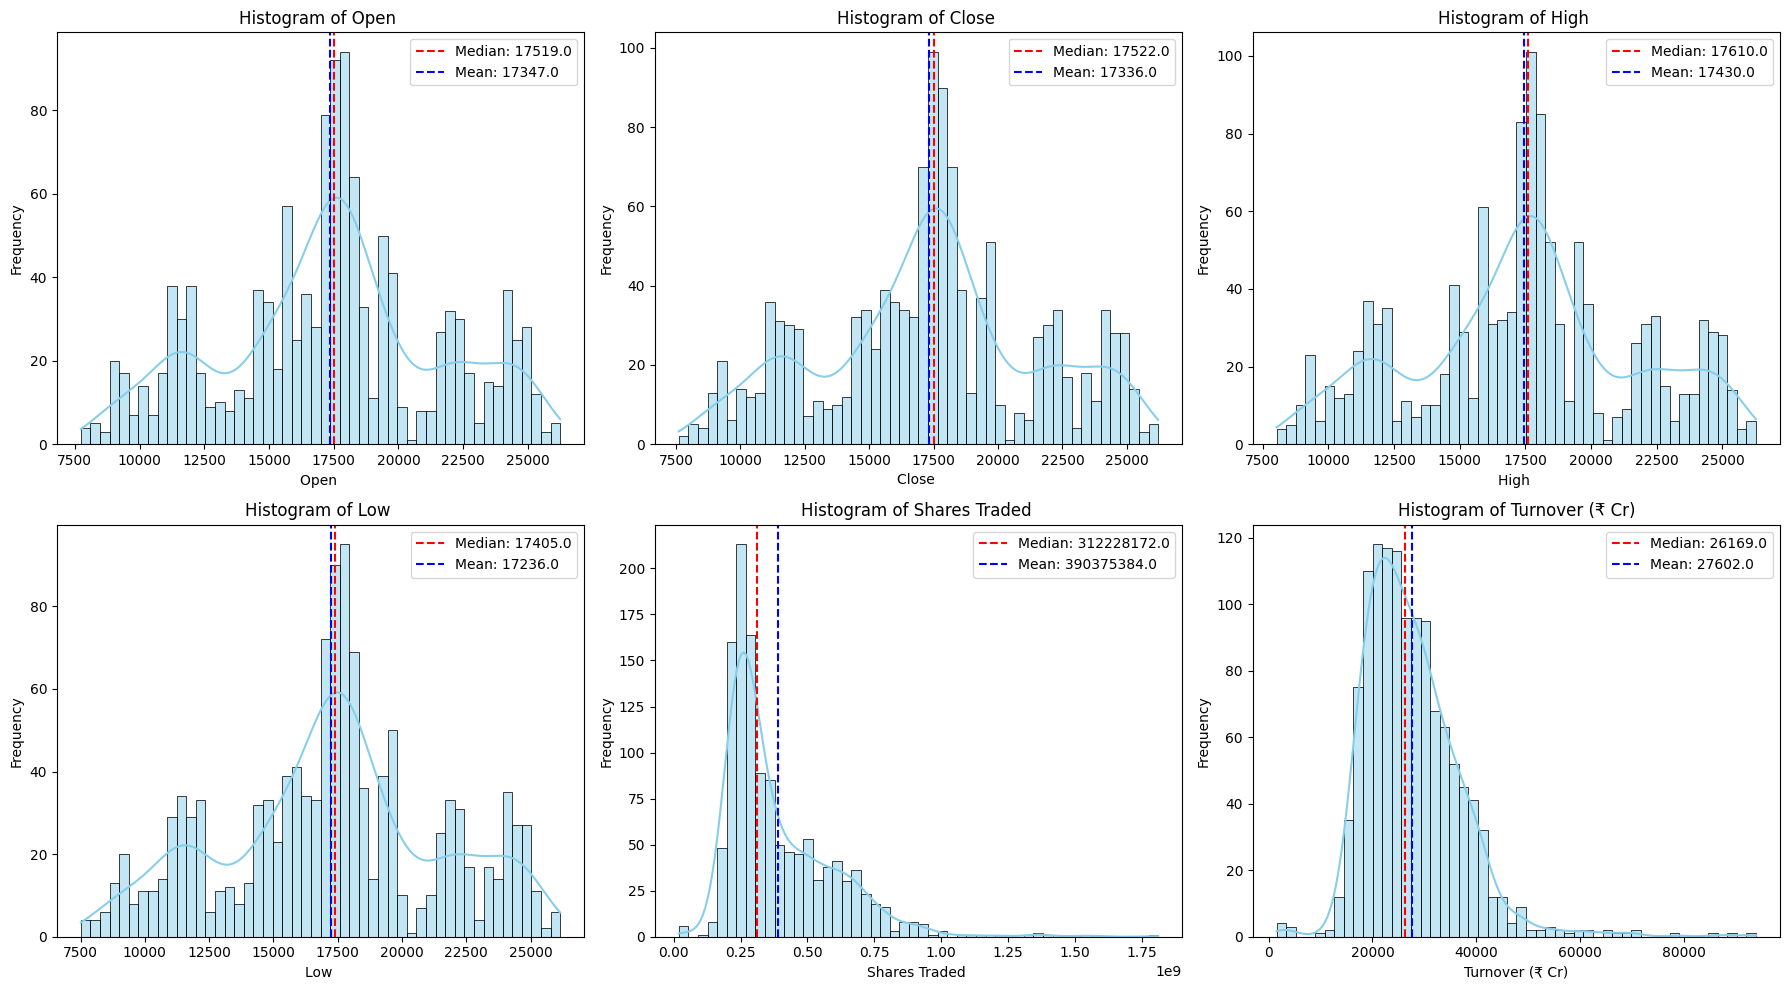

In [ ]:
# List of features to analyze
features = ['Open ', 'Close ', 'High ', 'Low ', 'Shares Traded ', 'Turnover (₹ Cr)']

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns of plots
axes = axes.flatten()

# Plot histograms and boxplots for each feature
for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axes[i], bins=50, color='skyblue')
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

    # Add a vertical line for the median
    median = df[feature].median()
    mean = df[feature].mean()
    axes[i].axvline(median, color='red', linestyle='--', label=f'Median: {median//1}')
    axes[i].axvline(mean, color='blue', linestyle='--', label=f'Mean: {mean//1}')
    axes[i].legend()
plt.tight_layout()
plt.show()

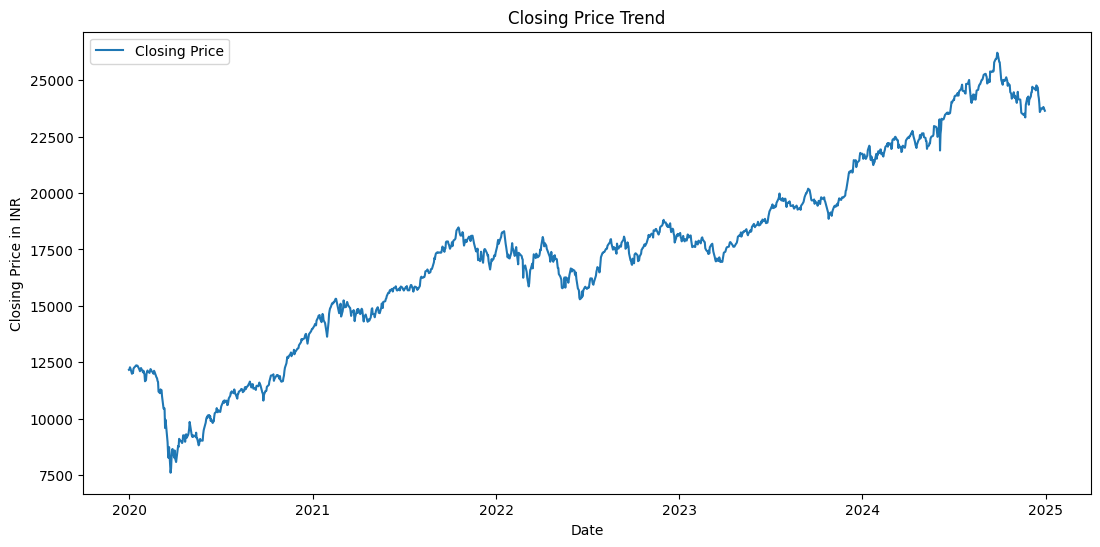

In [ ]:
#Trade Analysis
plt.figure(figsize=(13,6))
plt.plot(df['Date '],df['Close '],label = 'Closing Price')
plt.title('Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Closing Price in INR')
plt.legend()
plt.show()

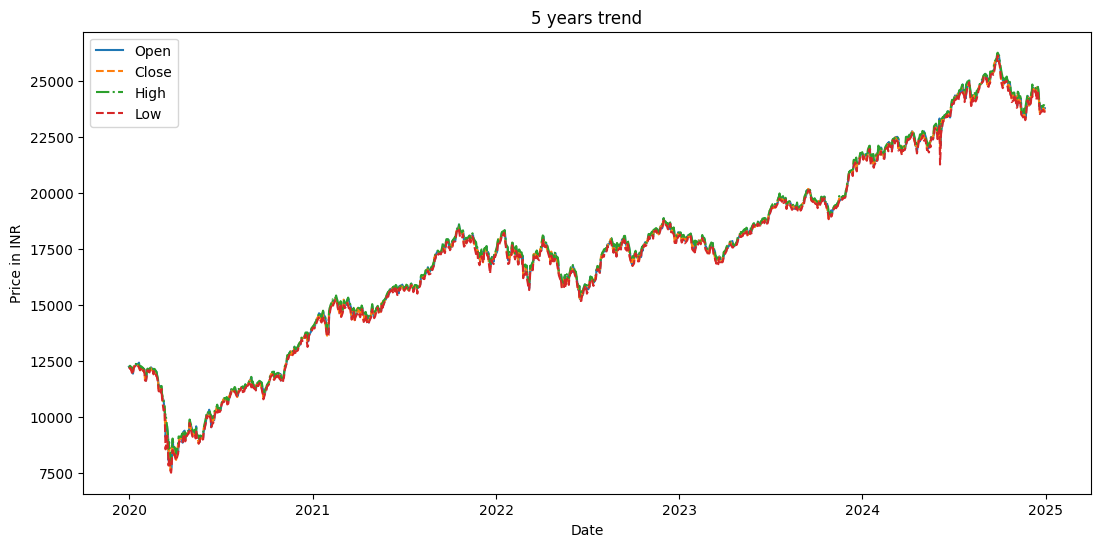

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(df['Date '],df['Open '],label='Open',linestyle='-')
plt.plot(df['Date '],df['Close '],label='Close',linestyle='--')
plt.plot(df['Date '],df['High '],label='High',linestyle='-.')
plt.plot(df['Date '],df['Low '],label='Low',linestyle='--')
plt.title('5 years trend')
plt.xlabel('Date')
plt.ylabel('Price in INR')
plt.legend()
plt.show()

In [ ]:
df.set_index('Date ', inplace=True)

In [ ]:
monthly_prices = df.resample('M')['Close '].agg(['first', 'last'])
monthly_prices['Monthly Return'] = ((monthly_prices['last'] / monthly_prices['first']) - 1) * 100
monthly_prices

<ipython-input-36-767615b54ed7>:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,first,last,Monthly Return
Date,,,
2019-12-31,12168.45,12168.45,0.000000
2020-01-31,12182.50,11962.10,-1.809152
2020-02-29,11661.85,11201.75,-3.945343
2020-03-31,11132.75,8597.75,-22.770654
2020-04-30,8253.80,9859.90,19.458916
...,...,...,...
2024-08-31,25010.90,25235.90,0.899608
2024-09-30,25278.70,25810.85,2.105132
2024-10-31,25796.90,24205.35,-6.169540


<ipython-input-37-5de5b14bb6b8>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'Date')

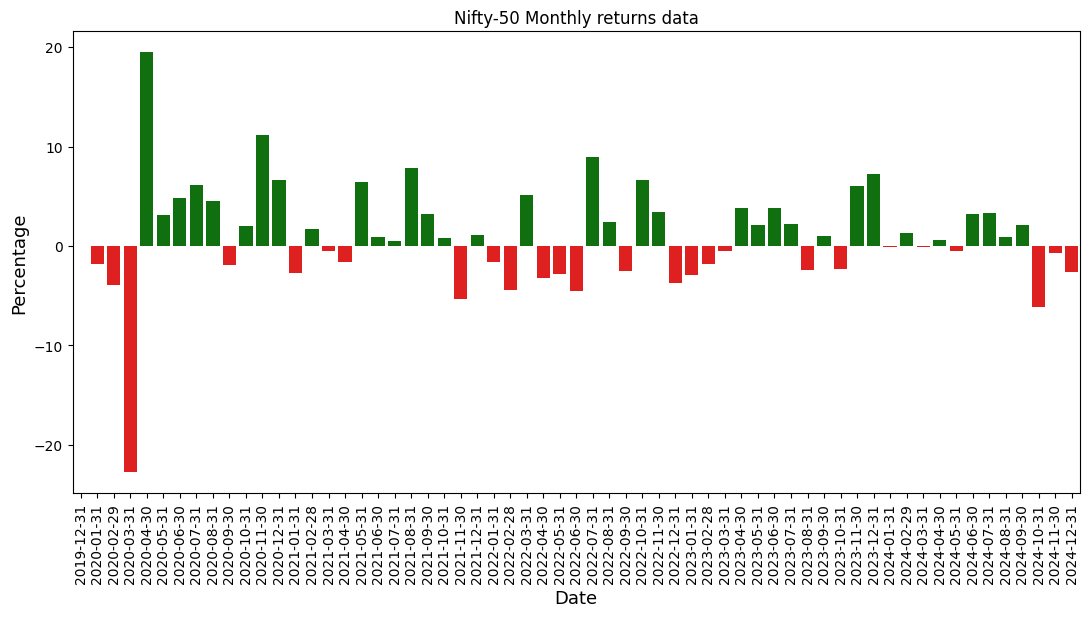

In [ ]:
color_monthly = ['red' if x < 0 else 'green' for x in monthly_prices['Monthly Return']]
plt.figure(figsize=(13,6))
sns.barplot(data = monthly_prices, x = 'Date ', y = 'Monthly Return', palette = color_monthly)
plt.xticks(rotation=90)
plt.title('Nifty-50 Monthly returns data')
plt.ylabel('Percentage',size=13)
plt.xlabel('Date',size=13)

Text(0, 0.5, 'Percentage')

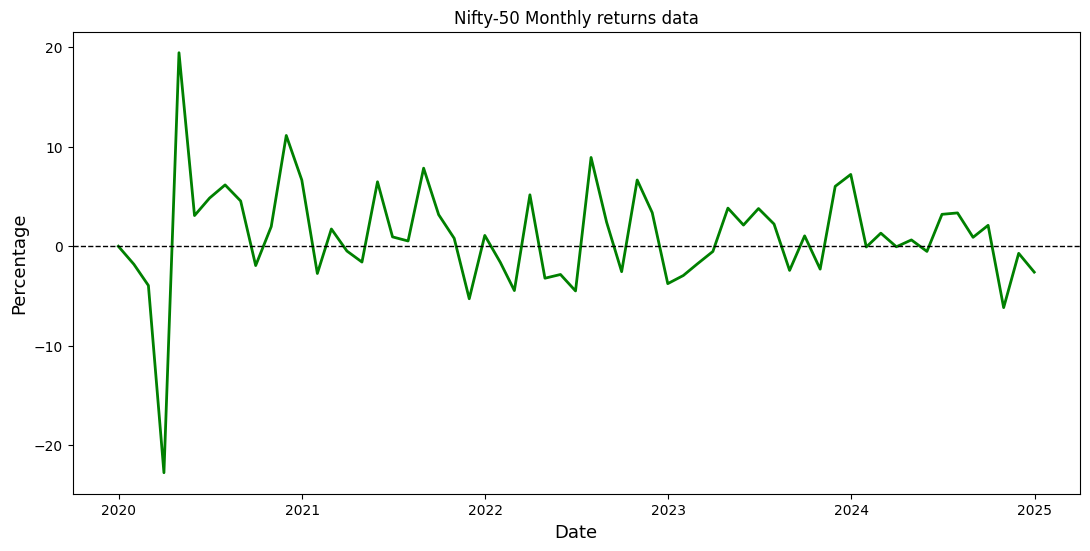

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(monthly_prices.index,monthly_prices['Monthly Return'],color= 'green',linewidth=2)

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Nifty-50 Monthly returns data')
plt.xlabel('Date',size=13)
plt.ylabel('Percentage',size=13)

In [ ]:
quarterly_prices = monthly_prices.resample('Q').agg({'Monthly Return': 'sum'})
quarterly_prices.rename(columns={'Monthly Return':'Quarterly Return'},inplace=True)
quarterly_prices

<ipython-input-39-06f4adda8859>:1: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



,Quarterly Return
Date,
2019-12-31,0.000000
2020-03-31,-28.525150
2020-06-30,27.388652
2020-09-30,8.780220
2020-12-31,19.770700
2021-03-31,-1.482289
2021-06-30,5.834970
2021-09-30,11.553483
2021-12-31,-3.392251


<ipython-input-40-7e12f0974d04>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




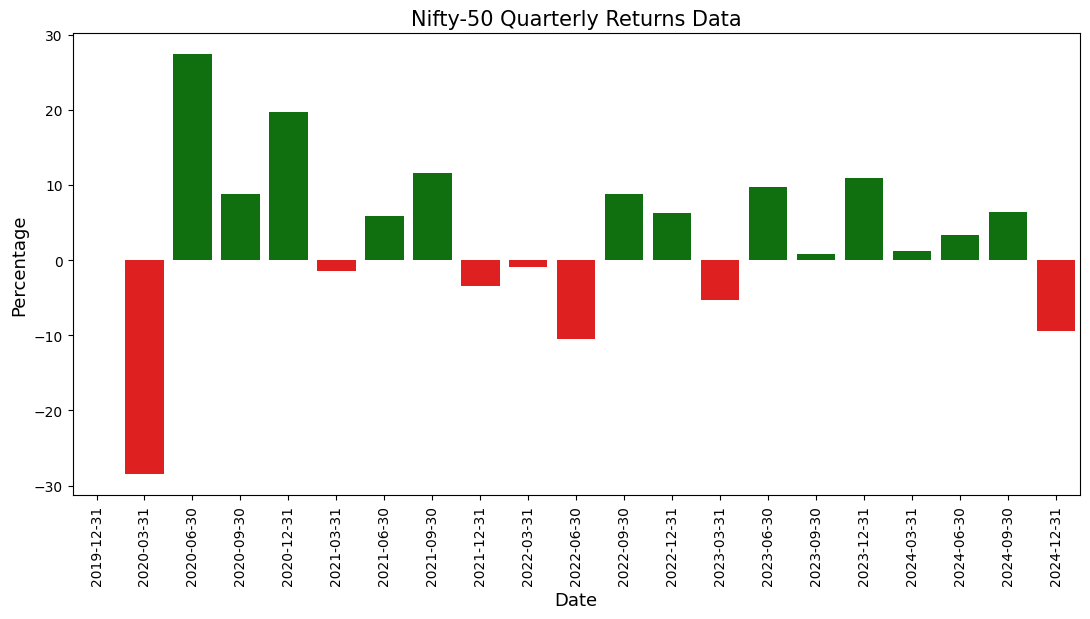

In [ ]:
color_quarterly = ['red' if x < 0 else 'green' for x in quarterly_prices['Quarterly Return']]
plt.figure(figsize=(13, 6))
sns.barplot(data=quarterly_prices, x=quarterly_prices.index, y='Quarterly Return', palette=color_quarterly)
plt.xticks(rotation=90)
plt.title('Nifty-50 Quarterly Returns Data', size=15)
plt.xlabel('Date', size=13)
plt.ylabel('Percentage', size=13)
plt.show()

Text(0, 0.5, 'Percentage')

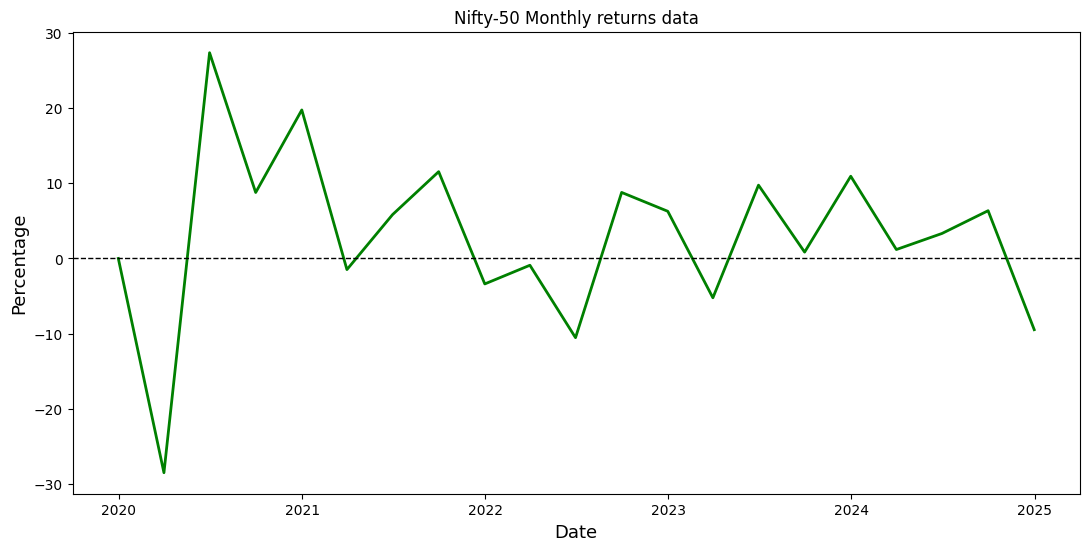

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(quarterly_prices.index,quarterly_prices['Quarterly Return'],color= 'green',linewidth=2)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Nifty-50 Monthly returns data')
plt.xlabel('Date',size=13)
plt.ylabel('Percentage',size=13)

In [ ]:
df['Daily Return'] = df['Close '].pct_change()
df = df.dropna(subset=['Daily Return'])

<ipython-input-43-020bad8385e3>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




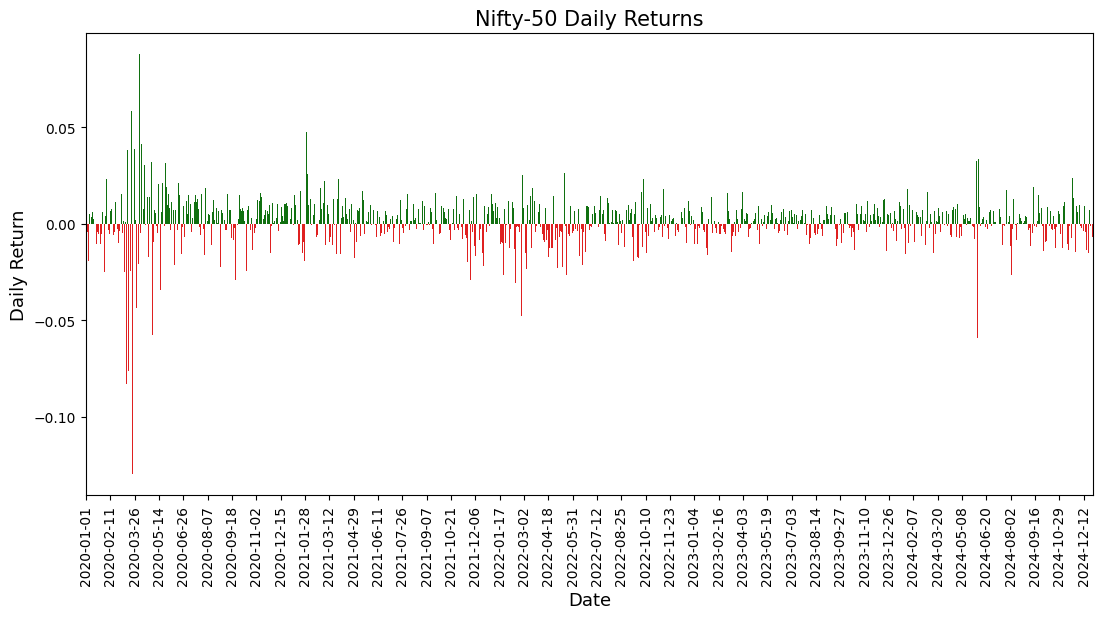

In [ ]:
color_daily = ['red' if x < 0 else 'green' for x in df['Daily Return']]

plt.figure(figsize=(13, 6))
sns.barplot(data=df, x=df.index, y='Daily Return', palette=color_daily)
plt.xticks(ticks=range(0, len(df.index), 30),
           labels=df.index[::30].strftime('%Y-%m-%d'),
           rotation=90)
plt.title('Nifty-50 Daily Returns', size=15)
plt.xlabel('Date', size=13)
plt.ylabel('Daily Return', size=13)
plt.show()

In [ ]:
df1 = pd.read_excel('sectors.xlsx')

In [ ]:
df1

,Company Name,NSE Symbol,Sector
0,HDFC Bank,HDFCBANK.NS,Financial Services
1,ICICI Bank,ICICIBANK.NS,Financial Services
2,State Bank of India (SBI),SBIN.NS,Financial Services
3,Kotak Mahindra Bank,KOTAKBANK.NS,Financial Services
4,Axis Bank,AXISBANK.NS,Financial Services
5,Bajaj Finance,BAJFINANCE.NS,Financial Services
6,Bajaj Finserv,BAJAJFINSV.NS,Financial Services
7,HDFC Life Insurance,HDFCLIFE.NS,Financial Services
8,SHRIRAM Finance Limited,SHRIRAMFIN.NS,Financial Services
9,IndusInd Bank Limited,INDUSINDBK.NS,Financial Services


In [ ]:
import plotly.graph_objects as go

sector_counts = df1['Sector'].value_counts().reset_index()
sector_counts.columns = ['Sector', 'Count']
sector_counts['Percentage'] = (sector_counts['Count'] / sector_counts['Count'].sum()) * 100

fig = go.Figure(go.Treemap(
    labels=sector_counts['Sector'],
    parents=[""] * len(sector_counts),
    values=sector_counts['Count'],
    hoverinfo="label+value+percent entry",
    texttemplate='%{label}<br>',
    textfont=dict(size=15),
    marker=dict(
        colors=sector_counts['Count'],
        colorscale='RdBu',
        showscale=True)))
fig.update_layout(
    title="Sector Distribution in NIFTY 50 Index",
    height=600,
)
fig.show()

In [ ]:
finance_symbols =[] # Finance
Automotive_symbols =[] # Automotive
IT_symbols = [] # Information Technology
OG_symbols = [] # OIL & GAS
CG_symbols = [] # Consumer Goods
health_symbols = [] # Healthcare/Pharma
MM_symbols = [] # Metals & Mining
CM_symbols = [] # Construction Materials
TC_symbols = [] # Telecommunication
CD_symbols = [] # Consumer Durables
Power_symbols = [] # Power
Services_symbols = [] # Services
Capital_Goods_symbols = [] # Capital Goods

finance = df1[df1['Sector']=='Financial Services']
for i in finance['NSE Symbol']:
  finance_symbols.append(i)

automotive = df1[df1['Sector']=='Automotive']
for i in automotive['NSE Symbol']:
  Automotive_symbols.append(i)

it = df1[df1['Sector']=='Information Technology']
for i in it['NSE Symbol']:
  IT_symbols.append(i)

og = df1[df1['Sector']=='Oil and Gas']
for i in og['NSE Symbol']:
  OG_symbols.append(i)

cg = df1[df1['Sector']=='Consumer Goods (FMCG)']
for i in cg['NSE Symbol']:
  CG_symbols.append(i)

hc = df1[df1['Sector']=='Healthcare/Pharma']
for i in hc['NSE Symbol']:
  health_symbols.append(i)

mm = df1[df1['Sector']=='Metals & Mining']
for i in mm['NSE Symbol']:
  MM_symbols.append(i)

cm = df1[df1['Sector']=='Construction Materials']
for i in cm['NSE Symbol']:
  CM_symbols.append(i)

tc = df1[df1['Sector']=='Telecommunication']
for i in tc['NSE Symbol']:
  TC_symbols.append(i)

cd = df1[df1['Sector']=='Consumer Durables']
for i in cd['NSE Symbol']:
  CD_symbols.append(i)

p = df1[df1['Sector']=='Power']
for i in p['NSE Symbol']:
  Power_symbols.append(i)

services = df1[df1['Sector']=='Services']
for i in services['NSE Symbol']:
  Services_symbols.append(i)

cap = df1[df1['Sector']=='Capital Goods']
for i in cap['NSE Symbol']:
  Capital_Goods_symbols.append(i)

In [ ]:
finance_symbols

['HDFCBANK.NS',
 'ICICIBANK.NS',
 'SBIN.NS',
 'KOTAKBANK.NS',
 'AXISBANK.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'HDFCLIFE.NS',
 'SHRIRAMFIN.NS',
 'INDUSINDBK.NS',
 'SBILIFE.NS']

In [ ]:
import yfinance as yf
start_date = "2019-12-31"
end_date = "2024-12-31"

data = yf.download(finance_symbols, start=start_date, end=end_date)

close_data = data['Close']

# Display the dataframe
print(close_data)


# If you want to save it to a CSV file
# close_data.to_csv('FINANCE.csv')

[*********************100%***********************]  11 of 11 completed

Ticker      AXISBANK.NS  BAJAJFINSV.NS  BAJFINANCE.NS  HDFCBANK.NS  \
Date                                                                 
2019-12-31   750.828552     937.157227    4164.231445  1221.188843   
2020-01-01   745.452026     935.670593    4160.838867  1227.428589   
2020-01-02   753.666138     948.356140    4175.342773  1235.252441   
2020-01-03   739.726929     932.418213    4123.619141  1217.636841   
2020-01-06   720.112366     902.173462    3930.145020  1191.285400   
...                 ...            ...            ...          ...   
2024-12-23  1079.150024    1563.400024    6866.700195  1801.000000   
2024-12-24  1078.900024    1564.550049    6808.200195  1798.099976   
2024-12-26  1076.699951    1559.300049    6815.750000  1790.750000   
2024-12-27  1077.449951    1579.300049    6907.750000  1798.250000   
2024-12-30  1069.949951    1576.699951    6888.250000  1777.900024   

Ticker      HDFCLIFE.NS  ICICIBANK.NS  INDUSINDBK.NS  KOTAKBANK.NS  \
Date               

In [ ]:
data = yf.download(Automotive_symbols, start=start_date, end=end_date)

close_data = data['Close']

# Display the dataframe
print(close_data)


# If you want to save it to a CSV file
close_data.to_csv('AUTOMOTIVE.csv')

[*********************100%***********************]  6 of 6 completed

Ticker      BAJAJ-AUTO.NS  EICHERMOT.NS  HEROMOTOCO.NS       M&M.NS  \
Date                                                                  
2019-12-31    2733.076904   2157.404297    2142.347412   503.722076   
2020-01-01    2703.128906   2115.296387    2133.139648   508.507751   
2020-01-02    2678.157959   2069.786865    2130.421143   511.587585   
2020-01-03    2636.153564   2030.347168    2132.964600   504.859253   
2020-01-06    2606.634521   1998.841553    2076.666504   497.041260   
...                   ...           ...            ...          ...   
2024-12-23    8768.450195   4750.549805    4272.600098  2909.300049   
2024-12-24    8778.049805   4792.899902    4259.100098  2928.699951   
2024-12-26    8878.500000   4801.350098    4275.000000  2975.649902   
2024-12-27    8928.299805   4876.899902    4237.950195  3049.449951   
2024-12-30    8779.900391   4855.799805    4187.600098  3002.899902   

Ticker         MARUTI.NS  TATAMOTORS.NS  
Date                              

In [ ]:
data = yf.download(IT_symbols, start=start_date, end=end_date)

close_data = data['Close']

# Display the dataframe
print(close_data)
a = pd.DataFrame(close_data)
a

# If you want to save it to a CSV file
close_data.to_csv('IT.csv')

ERROR:yfinance:Could not get exchangeTimezoneName for ticker 'WIPRO.NS' reason: 'chart'
[*********************100%***********************]  5 of 5 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WIPRO.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Ticker       HCLTECH.NS      INFY.NS       TCS.NS     TECHM.NS  WIPRO.NS
Date                                                                    
2019-12-31   479.035370   656.090393  1943.676880   650.172974       NaN
2020-01-01   482.281860   661.205078  1948.981445   650.002258       NaN
2020-01-02   483.630920   659.276001  1940.034912   653.371216       NaN
2020-01-03   493.328156   669.415894  1978.698730   661.090088       NaN
2020-01-06   490.756104   662.999878  1978.518433   657.081482       NaN
...                 ...          ...          ...          ...       ...
2024-12-23  1890.258423  1924.300049  4093.052979  1712.400024       NaN
2024-12-24  1884.248901  1909.050049  4113.920410  1704.900024       NaN
2024-12-26  1888.023560  1907.400024  4103.683594  1698.699951       NaN
2024-12-27  1879.332153  1916.750000  4099.500488  1711.650024       NaN
2024-12-30  1916.034668  1906.000000  4093.545166  1740.849976       NaN

[1238 rows x 5 columns]


In [ ]:
data = yf.download(OG_symbols, start=start_date, end=end_date)

close_data = data['Close']

# Display the dataframe
print(close_data)
a = pd.DataFrame(close_data)
a

# If you want to save it to a CSV file
close_data.to_csv('OIL&GAS.csv')

[*********************100%***********************]  4 of 4 completed

Ticker         BPCL.NS  COALINDIA.NS     ONGC.NS  RELIANCE.NS
Date                                                         
2019-12-31  185.121201    126.455688   92.755882   677.649414
2020-01-01  185.158844    126.814682   91.783669   675.657654
2020-01-02  183.614792    126.306107   92.215775   687.160339
2020-01-03  182.089539    126.754822   92.503845   687.988342
2020-01-06  176.685211    123.075172   90.919487   672.032349
...                ...           ...         ...          ...
2024-12-23  289.100006    382.950012  240.850006  1222.300049
2024-12-24  292.000000    384.500000  238.949997  1222.750000
2024-12-26  295.600006    386.600006  240.250000  1216.550049
2024-12-27  293.549988    380.500000  236.899994  1221.050049
2024-12-30  293.299988    377.899994  232.649994  1210.699951

[1238 rows x 4 columns]


In [ ]:
data = yf.download(CG_symbols, start=start_date, end=end_date)

close_data = data['Close']

# Display the dataframe
print(close_data)
a = pd.DataFrame(close_data)
a

# If you want to save it to a CSV file
close_data.to_csv('CONSUMER_GOODS.csv')

[*********************100%***********************]  5 of 5 completed


Ticker      BRITANNIA.NS  HINDUNILVR.NS      ITC.NS  NESTLEIND.NS  \
Date                                                                
2019-12-31   2740.485352    1783.256104  192.679535   1403.985474   
2020-01-01   2751.210449    1795.821533  193.003799   1403.387329   
2020-01-02   2763.655518    1797.212280  194.422333   1398.667725   
2020-01-03   2750.441162    1787.382812  193.328003   1385.777100   
2020-01-06   2735.281006    1776.254883  190.571960   1368.974609   
...                  ...            ...         ...           ...   
2024-12-23   4704.350098    2338.899902  474.250000   2151.600098   
2024-12-24   4744.100098    2335.550049  478.450012   2166.699951   
2024-12-26   4761.649902    2332.750000  476.950012   2149.899902   
2024-12-27   4769.299805    2341.250000  478.600006   2165.600098   
2024-12-30   4799.450195    2343.500000  477.000000   2159.899902   

Ticker      TATACONSUM.NS  
Date                       
2019-12-31     309.196625  
2020-01-01     311

In [ ]:
data = yf.download(health_symbols, start=start_date, end=end_date)
close_data = data['Close']

# Display the dataframe
print(close_data)
a = pd.DataFrame(close_data)
a

# If you want to save it to a CSV file
close_data.to_csv('HEALTHCARE.csv')

[*********************100%***********************]  4 of 4 completed

Ticker      APOLLOHOSP.NS     CIPLA.NS   DRREDDY.NS  SUNPHARMA.NS
Date                                                             
2019-12-31    1421.621094   458.113831   520.117371    410.866211
2020-01-01    1406.192383   455.910370   520.994934    412.528503
2020-01-02    1473.526978   453.611267   518.371338    413.145905
2020-01-03    1465.097900   450.210358   521.809204    422.312164
2020-01-06    1441.831177   447.144714   520.895447    417.895233
...                   ...          ...          ...           ...
2024-12-23    7265.100098  1476.050049  1341.349976   1814.599976
2024-12-24    7240.000000  1475.750000  1350.900024   1819.000000
2024-12-26    7261.149902  1490.550049  1355.150024   1841.349976
2024-12-27    7246.299805  1506.599976  1389.449951   1861.250000
2024-12-30    7314.250000  1521.400024  1376.900024   1883.900024

[1238 rows x 4 columns]


In [ ]:
data = yf.download(MM_symbols, start=start_date, end=end_date)
close_data = data['Close']

# Display the dataframe
print(close_data)
a = pd.DataFrame(close_data)
a

# If you want to save it to a CSV file
close_data.to_csv('METALS&MINING.csv')

[*********************100%***********************]  4 of 4 completed

Ticker      ADANIENT.NS  HINDALCO.NS  JSWSTEEL.NS  TATASTEEL.NS
Date                                                           
2019-12-31   206.322205   209.058380   251.020355     18.990564
2020-01-01   205.827103   207.269104   249.207779     18.817577
2020-01-02   209.144470   212.927155   256.969391     19.505508
2020-01-03   206.272705   209.348557   253.251221     19.459244
2020-01-06   197.607864   202.433136   245.629074     19.038839
...                 ...          ...          ...           ...
2024-12-23  2338.949951   634.150024   937.049988    141.710007
2024-12-24  2372.449951   627.450012   921.849976    140.380005
2024-12-26  2400.250000   628.750000   914.450012    140.360001
2024-12-27  2409.949951   617.400024   913.299988    138.910004
2024-12-30  2592.350098   601.099976   898.950012    136.880005

[1238 rows x 4 columns]


In [ ]:
data = yf.download(CM_symbols, start=start_date, end=end_date)
close_data = data['Close']

# Display the dataframe
print(close_data)
a = pd.DataFrame(close_data)
a

# If you want to save it to a CSV file
close_data.to_csv('CONSTRUCTION_MATERIALS.csv')

[*********************100%***********************]  2 of 2 completed

Ticker        GRASIM.NS  ULTRACEMCO.NS
Date                                  
2019-12-31   725.280701    3949.260986
2020-01-01   724.159119    3967.757568
2020-01-02   747.420044    4143.255859
2020-01-03   737.959717    4118.268555
2020-01-06   718.795044    4057.654541
...                 ...            ...
2024-12-23  2526.199951   11472.599609
2024-12-24  2501.850098   11390.349609
2024-12-26  2482.050049   11460.650391
2024-12-27  2480.300049   11406.549805
2024-12-30  2443.500000   11288.349609

[1238 rows x 2 columns]


In [ ]:
data = yf.download(TC_symbols, start=start_date, end=end_date)
close_data = data['Close']

# Display the dataframe
print(close_data)
a = pd.DataFrame(close_data)
a

# If you want to save it to a CSV file
close_data.to_csv('TELECOMMUNICATIONS.csv')

[*********************100%***********************]  1 of 1 completed

Ticker      BHARTIARTL.NS
Date                     
2019-12-31     439.348724
2020-01-01     436.938965
2020-01-02     438.770386
2020-01-03     438.674011
2020-01-06     433.420685
...                   ...
2024-12-23    1586.900024
2024-12-24    1583.900024
2024-12-26    1599.500000
2024-12-27    1599.849976
2024-12-30    1586.900024

[1238 rows x 1 columns]


In [ ]:
data = yf.download(CD_symbols, start=start_date, end=end_date)
close_data = data['Close']

# Display the dataframe
print(close_data)
a = pd.DataFrame(close_data)
a

# If you want to save it to a CSV file
close_data.to_csv('CONSUMER_DURABLES.csv')

[*********************100%***********************]  2 of 2 completed

Ticker      ASIANPAINT.NS     TITAN.NS
Date                                  
2019-12-31    1715.905518  1160.476440
2020-01-01    1723.836182  1128.044312
2020-01-02    1721.384644  1128.874634
2020-01-03    1683.653198  1113.342285
2020-01-06    1641.114746  1131.805420
...                   ...          ...
2024-12-23    2279.199951  3396.949951
2024-12-24    2284.000000  3353.399902
2024-12-26    2262.399902  3323.050049
2024-12-27    2271.399902  3309.199951
2024-12-30    2288.250000  3257.350098

[1238 rows x 2 columns]


In [ ]:
data = yf.download(Power_symbols, start=start_date, end=end_date)
close_data = data['Close']

# Display the dataframe
print(close_data)
a = pd.DataFrame(close_data)
a

# If you want to save it to a CSV file
close_data.to_csv('Power.csv')

[*********************100%***********************]  2 of 2 completed

Ticker         NTPC.NS  POWERGRID.NS
Date                                
2019-12-31   90.810608     79.136978
2020-01-01   92.717598     81.320808
2020-01-02   92.603195     81.154411
2020-01-03   91.039452     80.280876
2020-01-06   90.696205     80.322479
...                ...           ...
2024-12-23  333.649994    315.299988
2024-12-24  335.299988    310.100006
2024-12-26  334.649994    310.299988
2024-12-27  335.000000    309.399994
2024-12-30  331.399994    307.549988

[1238 rows x 2 columns]


In [ ]:
data = yf.download(Services_symbols, start=start_date, end=end_date)
close_data = data['Close']

# Display the dataframe
print(close_data)
a = pd.DataFrame(close_data)
a

# If you want to save it to a CSV file
close_data.to_csv('SERVICES.csv')

[*********************100%***********************]  2 of 2 completed

Ticker      ADANIPORTS.NS     TRENT.NS
Date                                  
2019-12-31     353.108612   523.920349
2020-01-01     364.348297   526.405151
2020-01-02     369.654602   538.033386
2020-01-03     369.027496   532.616821
2020-01-06     366.808502   526.703247
...                   ...          ...
2024-12-23    1191.800049  6946.000000
2024-12-24    1182.199951  7007.149902
2024-12-26    1243.949951  7063.700195
2024-12-27    1230.699951  7118.299805
2024-12-30    1218.500000  6954.350098

[1238 rows x 2 columns]


In [ ]:
data = yf.download(Capital_Goods_symbols, start=start_date, end=end_date)
close_data = data['Close']

# Display the dataframe
print(close_data)
a = pd.DataFrame(close_data)
a

# If you want to save it to a CSV file
close_data.to_csv('CAPITAL_GOODS.csv')

[*********************100%***********************]  2 of 2 completed


Ticker          BEL.NS        LT.NS
Date                               
2019-12-31   30.045065  1184.547363
2020-01-01   30.075098  1195.268799
2020-01-02   30.976000  1227.524048
2020-01-03   30.315342  1218.171387
2020-01-06   29.114141  1201.473389
...                ...          ...
2024-12-23  294.350006  3640.500000
2024-12-24  292.450012  3639.750000
2024-12-26  295.200012  3629.500000
2024-12-27  292.049988  3608.100098
2024-12-30  284.899994  3578.949951

[1238 rows x 2 columns]


In [ ]:
data = yf.download('WIPRO.NS', start=start_date, end=end_date)
close_data = data['Close']

# Display the dataframe
print(close_data)
a = pd.DataFrame(close_data)
a
close_data.to_csv('Wipro.csv')

[*********************100%***********************]  1 of 1 completed

Ticker        WIPRO.NS
Date                  
2019-12-31  119.435783
2020-01-01  120.359001
2020-01-02  120.650551
2020-01-03  122.011093
2020-01-06  122.521286
...                ...
2024-12-23  307.899994
2024-12-24  305.299988
2024-12-26  305.049988
2024-12-27  309.100006
2024-12-30  303.700012

[1238 rows x 1 columns]


In [ ]:
a=[]
for j in df1['NSE Symbol']:
  a.append(j)
print(a)

['HDFCBANK.NS', 'ICICIBANK.NS', 'SBIN.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'HDFCLIFE.NS', 'SHRIRAMFIN.NS', 'INDUSINDBK.NS', 'SBILIFE.NS', 'TCS.NS', 'INFY.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS', 'RELIANCE.NS', 'ONGC.NS', 'BPCL.NS', 'COALINDIA.NS', 'HINDUNILVR.NS', 'ITC.NS', 'NESTLEIND.NS', 'BRITANNIA.NS', 'TATACONSUM.NS', 'MARUTI.NS', 'M&M.NS', 'TATAMOTORS.NS', 'BAJAJ-AUTO.NS', 'HEROMOTOCO.NS', 'EICHERMOT.NS', 'SUNPHARMA.NS', 'DRREDDY.NS', 'CIPLA.NS', 'APOLLOHOSP.NS', 'TATASTEEL.NS', 'HINDALCO.NS', 'JSWSTEEL.NS', 'ADANIENT.NS', 'ULTRACEMCO.NS', 'GRASIM.NS', 'BHARTIARTL.NS', 'TITAN.NS', 'ASIANPAINT.NS', 'NTPC.NS', 'POWERGRID.NS', 'ADANIPORTS.NS', 'TRENT.NS', 'LT.NS', 'BEL.NS']


In [ ]:
nifty50_tickers = a
cap = []

print("Nifty 50 Companies - Market Capitalization (in units of the local currency):\n")
for ticker in nifty50_tickers:
    try:
        # Fetch the ticker data
        stock = yf.Ticker(ticker)
        info = stock.info

        # Extract market capitalization
        market_cap = info.get("marketCap", None)

        if market_cap is None:
            cap_str = "Not Available"
        else:
            # Optionally, format the market cap (e.g., in billions)
            cap_str = f"{market_cap:,}"
            cap.append(market_cap)

        print(f"{ticker}: Market Cap = {cap_str}")
    except Exception as e:
        print(f"Error retrieving data for {ticker}: {e}")
print(cap)

Nifty 50 Companies - Market Capitalization (in units of the local currency):

HDFCBANK.NS: Market Cap = 12,839,679,950,848
ICICIBANK.NS: Market Cap = 8,861,968,760,832
SBIN.NS: Market Cap = 6,779,587,526,656
KOTAKBANK.NS: Market Cap = 3,754,261,479,424
AXISBANK.NS: Market Cap = 3,065,647,464,448
BAJFINANCE.NS: Market Cap = 5,157,606,653,952
BAJAJFINSV.NS: Market Cap = 2,834,903,072,768
HDFCLIFE.NS: Market Cap = 1,343,975,849,984
SHRIRAMFIN.NS: Market Cap = 1,007,553,347,584
INDUSINDBK.NS: Market Cap = 784,700,145,664
SBILIFE.NS: Market Cap = 1,464,297,324,544
TCS.NS: Market Cap = 14,668,279,054,336
INFY.NS: Market Cap = 7,726,033,272,832
WIPRO.NS: Market Cap = 3,273,130,770,432
HCLTECH.NS: Market Cap = 4,580,627,185,664
TECHM.NS: Market Cap = 1,464,720,687,104
RELIANCE.NS: Market Cap = 16,927,001,935,872
ONGC.NS: Market Cap = 3,099,156,807,680
BPCL.NS: Market Cap = 1,072,022,028,288
COALINDIA.NS: Market Cap = 2,299,314,569,216
HINDUNILVR.NS: Market Cap = 5,719,520,706,560
ITC.NS: Marke

In [ ]:
m_c = {'NSE symbol':a,'Market_CAP':cap}

In [ ]:
market_cap=pd.DataFrame(m_c)

In [ ]:
market_cap.to_excel('Market_Capital.xlsx')

#**Forecaste LSTM**

In [ ]:
df

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,2019-12-31,12247.10,12247.10,12151.80,12168.45,426931711.0,14812.89
1,2020-01-01,12202.15,12222.20,12165.30,12182.50,304078039.0,10445.68
2,2020-01-02,12198.55,12289.90,12195.25,12282.20,407697594.0,15256.55
3,2020-01-03,12261.10,12265.60,12191.35,12226.65,428770054.0,16827.27
4,2020-01-06,12170.60,12179.10,11974.20,11993.05,396501419.0,16869.22
...,...,...,...,...,...,...,...
1238,2024-12-23,23738.20,23869.55,23647.20,23753.45,189758237.0,18243.28
1239,2024-12-24,23769.10,23867.65,23685.15,23727.65,177664746.0,16010.71
1240,2024-12-26,23775.80,23854.50,23653.60,23750.20,177681783.0,16695.10
1241,2024-12-27,23801.40,23938.85,23800.60,23813.40,176821521.0,17164.99


In [ ]:
# Creating a new DataFrame with only the 'Close ' column
data = df.filter(['Close '])
dataset = data.values

# Number of rows to train the model
training_data_len = int(np.ceil(len(dataset)*0.70))
training_data_len

871

Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataset)
scaled_data

array([[0.24498812],
       [0.24574326],
       [0.25110181],
       ...,
       [0.86746875],
       [0.87086554],
       [0.86180922]])

Training Data

In [ ]:


train_data = scaled_data[0:int(training_data_len), : ]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)

x_train,y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

[array([0.24498812, 0.24574326, 0.25110181, 0.24811618, 0.23556095,
       0.23878038, 0.23729697, 0.2475384 , 0.24973664, 0.25364671,
       0.25540692, 0.25438573, 0.25504144, 0.25487214, 0.24800331,
       0.24506337, 0.24168001, 0.24562771, 0.24927711, 0.24233035,
       0.23893356, 0.24289469, 0.23785862, 0.23389749, 0.21776005,
       0.22023509, 0.23484075, 0.24072601, 0.24334885, 0.24122048,
       0.23762751, 0.24173376, 0.24674833, 0.24532135, 0.24203205,
       0.23839609, 0.23553139, 0.2427012 , 0.24027991, 0.22676531,
       0.22507229, 0.21865494, 0.21622559, 0.19303121, 0.18932268,
       0.19848918, 0.19567823, 0.19664567, 0.18162078, 0.15270507,
       0.15307861, 0.10641305, 0.12603328, 0.08530404, 0.0729235 ,
       0.04614421, 0.03510733, 0.06101323, 0.        , 0.01025487])]
[0.0380311515763902]
[array([0.24498812, 0.24574326, 0.25110181, 0.24811618, 0.23556095,
       0.23878038, 0.23729697, 0.2475384 , 0.24973664, 0.25364671,
       0.25540692, 0.25438573, 0.2550

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
from matplotlib import pyplot

model = Sequential()
model.add(LSTM(128,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(128,return_sequences = False))
# model.add(Dense(64))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

history = model.fit(x_train,y_train,batch_size=16,epochs=300,validation_split=0.20,shuffle=False)
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

Epoch 1/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0014

KeyboardInterrupt: 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
from matplotlib import pyplot

model = Sequential()
model.add(LSTM(128,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(128,return_sequences = False))
model.add(Dense(64,activation='relu'))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,batch_size=1,epochs=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


811/811 ━━━━━━━━━━━━━━━━━━━━ 66s 76ms/step - loss: 0.0060


In [ ]:
test_data = scaled_data[training_data_len-60: , : ]

x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)

predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step


749.6259049220293

<ipython-input-132-f2cd4df963a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


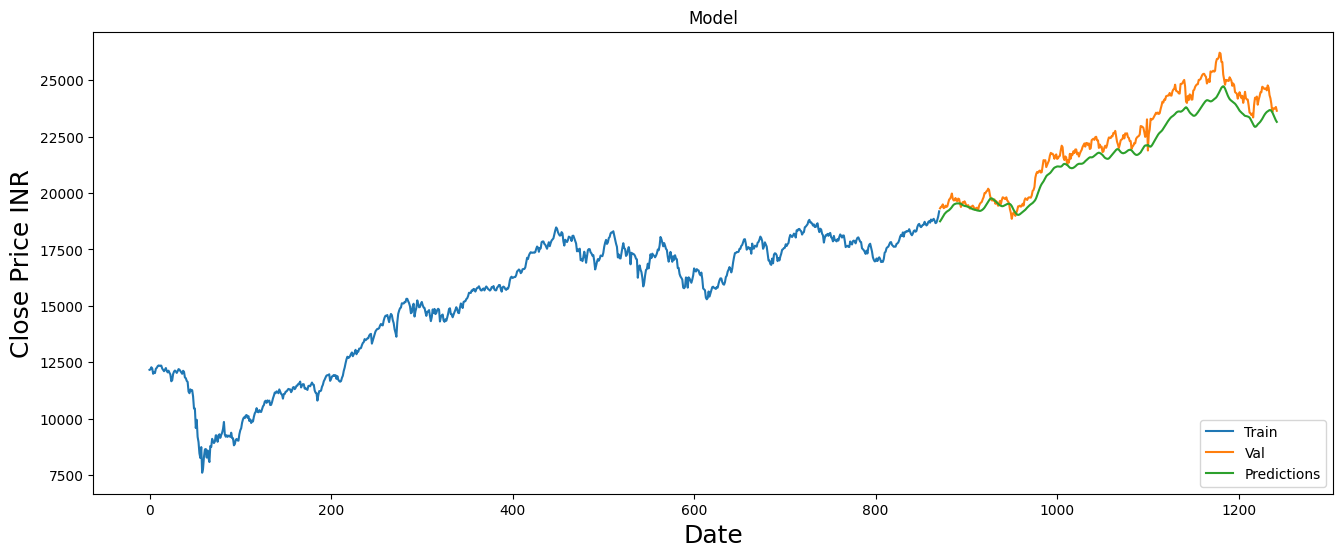

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close '])
plt.plot(valid[['Close ', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Prediction
y_pred = model.predict(X_test)

# We create a dataframe from y_pred to have date-time indexes.
pred_data = pd.DataFrame(y_pred[:,0], test_original.index,columns=['Close'])

# Apply inverse transformation from 1.d

# Add the differenciation term
pred_data['Close'] = pred_data['Close'] + df_close_tf.shift().values[-test_days:]

# Take the square, and the exponent
pred_data = pred_data.apply(np.square)
pred_data = pred_data.apply(np.exp)


# Plot actual prices vs predicted prices
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(test_original,'b',label='Actual prices')
plt.plot(pred_data, 'orange',label='Predicted prices')
plt.title(company + ' Stock Price')

plt.legend()# Prediction
y_pred = model.predict(X_test)

# We create a dataframe from y_pred to have date-time indexes.
pred_data = pd.DataFrame(y_pred[:,0], test_original.index,columns=['Close'])

# Apply inverse transformation from 1.d

# Add the differenciation term
pred_data['Close'] = pred_data['Close'] + df_close_tf.shift().values[-test_days:]

# Take the square, and the exponent
pred_data = pred_data.apply(np.square)
pred_data = pred_data.apply(np.exp)


# Plot actual prices vs predicted prices
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(test_original,'b',label='Actual prices')
plt.plot(pred_data, 'orange',label='Predicted prices')
plt.title(company + ' Stock Price')

plt.legend()

NameError: name 'model' is not defined